## CRISTIANO RONALDO vs LIONEL MESSI

This is a practice project performed by **Warepam Richard Singh**. 

It is a old dataset and I will performed it once I collect the new updated dataset later. It is a practice of "Exploratory Data Analysis".

You can check him out: https://linktr.ee/richardwarepam16

## Import all the necessary Libraries:

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/macbookpro/Downloads/cristiano_vs_messi.csv')

In [4]:
df.head()

,player,comp,round,date,venue,opp,pos,min,type,assisted
0,ronaldo,Liga NOS,6,10/7/2002,H,Moreirense,RW,34',NaN,NaN
1,ronaldo,Liga NOS,6,10/7/2002,H,Moreirense,NaN,90',NaN,NaN
2,ronaldo,Liga NOS,8,10/26/2002,A,Boavista,NaN,88',NaN,Carlos Martins
3,ronaldo,Taça de Portugal Placard,Fourth Round,11/24/2002,H,Estarreja,NaN,67',Left-footed shot,César Prates
4,ronaldo,Taça de Portugal Placard,Fifth Round,12/18/2002,H,Oliv. Hospital,NaN,13',NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   player    1300 non-null   object
 1   comp      846 non-null    object
 2   round     846 non-null    object
 3   date      846 non-null    object
 4   venue     846 non-null    object
 5   opp       846 non-null    object
 6   pos       793 non-null    object
 7   min       1300 non-null   object
 8   type      1281 non-null   object
 9   assisted  874 non-null    object
dtypes: object(10)
memory usage: 101.7+ KB


In [6]:
df.columns

Index(['player', 'comp', 'round', 'date', 'venue', 'opp', 'pos', 'min', 'type',
       'assisted'],
      dtype='object')

In [7]:
df['comp'] = df['comp'].ffill()
df['date'] = df['date'].ffill()
df['round'] = df['round'].ffill()
df['venue'] = df['venue'].ffill()
df['opp'] = df['opp'].ffill()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   player    1300 non-null   object
 1   comp      1300 non-null   object
 2   round     1300 non-null   object
 3   date      1300 non-null   object
 4   venue     1300 non-null   object
 5   opp       1300 non-null   object
 6   pos       793 non-null    object
 7   min       1300 non-null   object
 8   type      1281 non-null   object
 9   assisted  874 non-null    object
dtypes: object(10)
memory usage: 101.7+ KB


In [8]:
df['min'] = df['min'].apply(lambda x: x.replace("'",''))
df['min'] = df['min'].apply(lambda x: x.replace("+",''))
df['min'].unique()

array(['34', '90', '88', '67', '13', '80', '74', '89', '60', '4', '44',
       '87', '9', '8', '54', '58', '451', '21', '76', '63', '12', '68',
       '14', '38', '45', '59', '23', '19', '73', '82', '10', '39', '84',
       '85', '47', '50', '77', '49', '28', '5', '62', '51', '41', '35',
       '903', '22', '81', '48', '70', '902', '69', '56', '79', '16', '53',
       '3', '24', '32', '26', '25', '30', '43', '65', '11', '6', '57',
       '61', '17', '27', '1', '75', '2', '64', '71', '18', '78', '29',
       '36', '15', '55', '86', '901', '72', '20', '42', '103', '46', '52',
       '904', '37', '66', '906', '31', '40', '120', '83', '7', '33', '97',
       '104', '105', '109', '907', '457', '110', '452', '454'],
      dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   player    1300 non-null   object
 1   comp      1300 non-null   object
 2   round     1300 non-null   object
 3   date      1300 non-null   object
 4   venue     1300 non-null   object
 5   opp       1300 non-null   object
 6   pos       793 non-null    object
 7   min       1300 non-null   object
 8   type      1281 non-null   object
 9   assisted  874 non-null    object
dtypes: object(10)
memory usage: 101.7+ KB


In [10]:
df['min'] = pd.to_numeric(df['min'])
df['time_class'] = df['min'].apply(lambda x: 'first_half' if x<= 45 else('second_half' if 45<x<=90 else 'extra_time'))
df.head()

,player,comp,round,date,venue,opp,pos,min,type,assisted,time_class
0,ronaldo,Liga NOS,6,10/7/2002,H,Moreirense,RW,34,NaN,NaN,first_half
1,ronaldo,Liga NOS,6,10/7/2002,H,Moreirense,NaN,90,NaN,NaN,second_half
2,ronaldo,Liga NOS,8,10/26/2002,A,Boavista,NaN,88,NaN,Carlos Martins,second_half
3,ronaldo,Taça de Portugal Placard,Fourth Round,11/24/2002,H,Estarreja,NaN,67,Left-footed shot,César Prates,second_half
4,ronaldo,Taça de Portugal Placard,Fifth Round,12/18/2002,H,Oliv. Hospital,NaN,13,NaN,NaN,first_half


In [12]:
df['assisted'] = df['assisted'].fillna(0)
df['solo'] = df['assisted'].apply(lambda x: 'solo' if x==0 else 'assisted')
df.head()

,player,comp,round,date,venue,opp,pos,min,type,assisted,time_class,solo
0,ronaldo,Liga NOS,6,10/7/2002,H,Moreirense,RW,34,NaN,0,first_half,solo
1,ronaldo,Liga NOS,6,10/7/2002,H,Moreirense,NaN,90,NaN,0,second_half,solo
2,ronaldo,Liga NOS,8,10/26/2002,A,Boavista,NaN,88,NaN,Carlos Martins,second_half,assisted
3,ronaldo,Taça de Portugal Placard,Fourth Round,11/24/2002,H,Estarreja,NaN,67,Left-footed shot,César Prates,second_half,assisted
4,ronaldo,Taça de Portugal Placard,Fifth Round,12/18/2002,H,Oliv. Hospital,NaN,13,NaN,0,first_half,solo


In [13]:
from datetime import date
df['date'] = pd.to_datetime(df['date']) 
L = ['year','month','day','dayofweek','dayofyear','weekofyear','quarter']
df = df.join(pd.concat((getattr(df['date'].dt, i).rename(i) for i in L), axis =1))

/var/folders/mk/6z3ghsr92q750bdc76s14vy40000gn/T/ipykernel_1475/1239558488.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df = df.join(pd.concat((getattr(df['date'].dt, i).rename(i) for i in L), axis =1))


In [14]:
df['dayofweek'] = pd.to_numeric(df['dayofweek'])
df['dayofweek'] = df['dayofweek'].apply(lambda x: x+1)
df['dayofweek'].unique()
df['goal'] = df['goal'] = 1

In [15]:
df.head()

,player,comp,round,date,venue,opp,pos,min,type,assisted,time_class,solo,year,month,day,dayofweek,dayofyear,weekofyear,quarter,goal
0,ronaldo,Liga NOS,6,2002-10-07,H,Moreirense,RW,34,NaN,0,first_half,solo,2002,10,7,1,280,41,4,1
1,ronaldo,Liga NOS,6,2002-10-07,H,Moreirense,NaN,90,NaN,0,second_half,solo,2002,10,7,1,280,41,4,1
2,ronaldo,Liga NOS,8,2002-10-26,A,Boavista,NaN,88,NaN,Carlos Martins,second_half,assisted,2002,10,26,6,299,43,4,1
3,ronaldo,Taça de Portugal Placard,Fourth Round,2002-11-24,H,Estarreja,NaN,67,Left-footed shot,César Prates,second_half,assisted,2002,11,24,7,328,47,4,1
4,ronaldo,Taça de Portugal Placard,Fifth Round,2002-12-18,H,Oliv. Hospital,NaN,13,NaN,0,first_half,solo,2002,12,18,3,352,51,4,1


In [16]:
df['player'].value_counts()

ronaldo    656
messi      644
Name: player, dtype: int64

Text(0.5, 1.0, 'Messi')

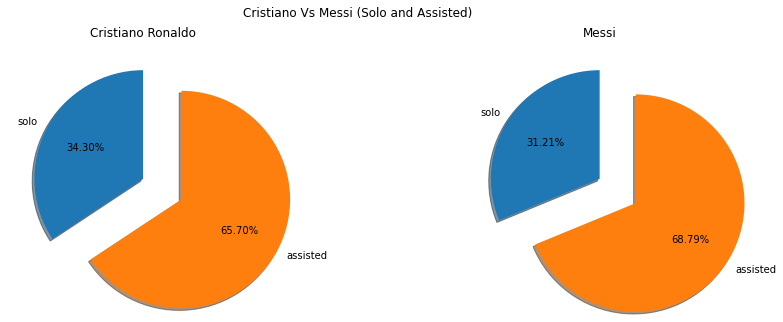

In [19]:
df_ronaldo = df.loc[df['player'] == 'ronaldo']
df_messi = df.loc[df['player'] == 'messi']

ronlado_solo = df_ronaldo[df_ronaldo['solo'] == 'solo']
ronlado_assisted = df_ronaldo[df_ronaldo['solo'] == 'assisted']
slices = [len(ronlado_solo),len(ronlado_assisted)]
labels = ['solo','assisted']

messi_solo = df_messi[df_messi['solo'] == 'solo']
messi_assisted = df_messi[df_messi['solo'] == 'assisted']
slices1 = [len(messi_solo),len(messi_assisted)]
labels1 = ['solo','assisted']

fig,axes = plt.subplots(1,2, figsize = (15,5), sharey= False)
fig.suptitle('Cristiano Vs Messi (Solo and Assisted)')

axes[0].pie(slices, labels = labels, startangle = 90, shadow = True, explode = (0, 0.4), autopct = '%1.2f%%')
axes[0].set_title('Cristiano Ronaldo')
axes[1].pie(slices1, labels = labels1, startangle = 90, shadow = True, explode = (0, 0.4), autopct = '%1.2f%%')
axes[1].set_title('Messi')


## INCOMPLETE